In [379]:
#importing libraries and the dataset
import pandas as pd
import numpy as np
import datetime as dt
covid_data_comp = pd.read_csv("C:\\Users\\USER\\Downloads\\Week 11 Capstone 3mtt\\covid_19_clean_complete.csv")

In [381]:
# Check for missing values
print(covid_data_comp.isnull().sum())

# Drop duplicates
covid_data_comp.drop_duplicates(inplace=True)

# Standardize date format
covid_data_comp['Date'] = pd.to_datetime(covid_data_comp['Date'])

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


In [383]:
covid_data_comp

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


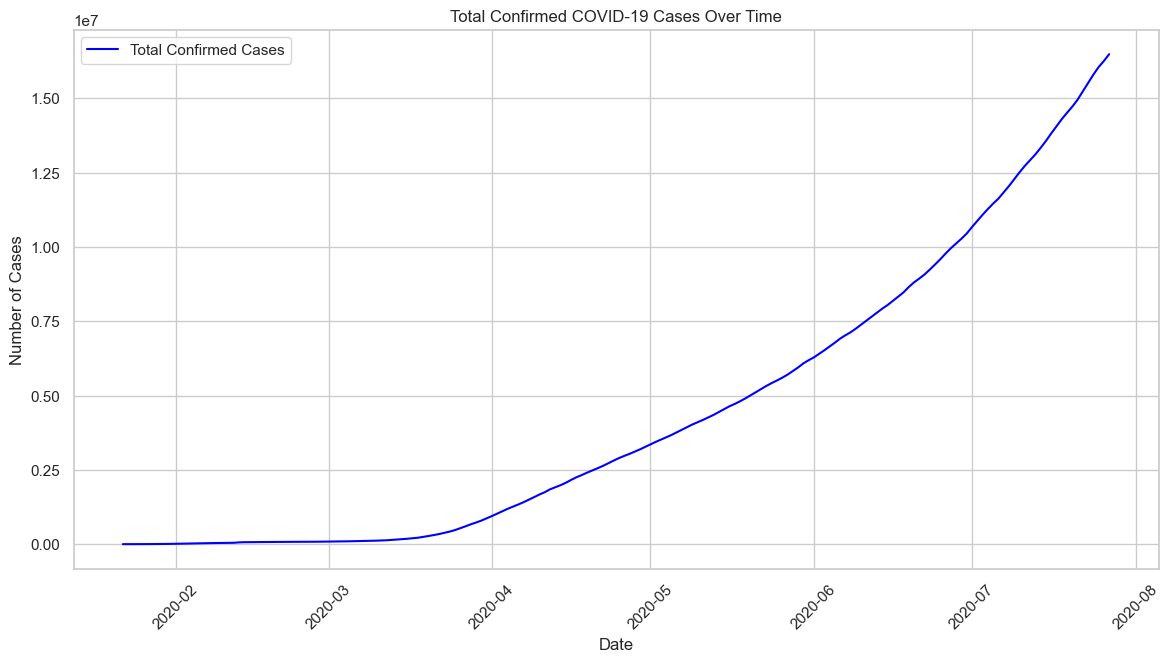

In [385]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style='whitegrid')

# Plot total confirmed cases over time
plt.figure(figsize=(14, 7))
total_cases = covid_data_comp.groupby('Date')['Confirmed'].sum()
plt.plot(total_cases.index, total_cases.values, label='Total Confirmed Cases', color='blue')
plt.title('Total Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=45)
plt.savefig("Confirmed cases over time.png", dpi = 500)
plt.show()

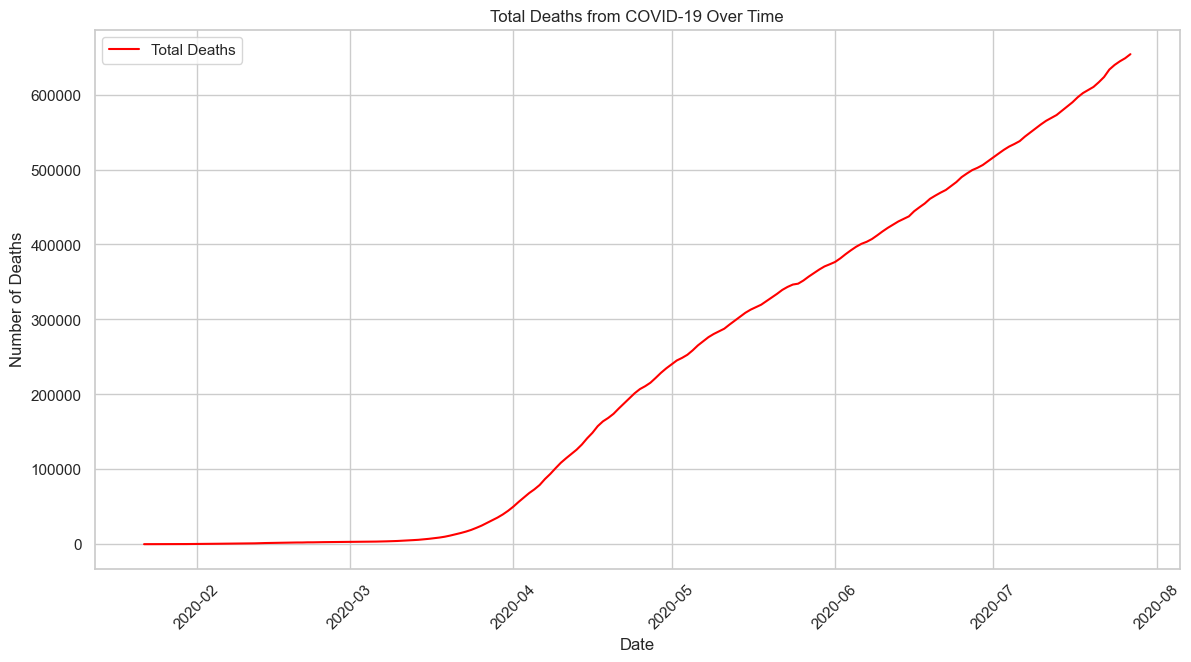

In [387]:
# Plot total deaths over time
plt.figure(figsize=(14, 7))
total_deaths = covid_data_comp.groupby('Date')['Deaths'].sum()
plt.plot(total_deaths.index, total_deaths.values, label='Total Deaths', color='red')
plt.title('Total Deaths from COVID-19 Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend()
plt.xticks(rotation=45)
plt.savefig("Death cases over time.png", dpi = 500)
plt.show()

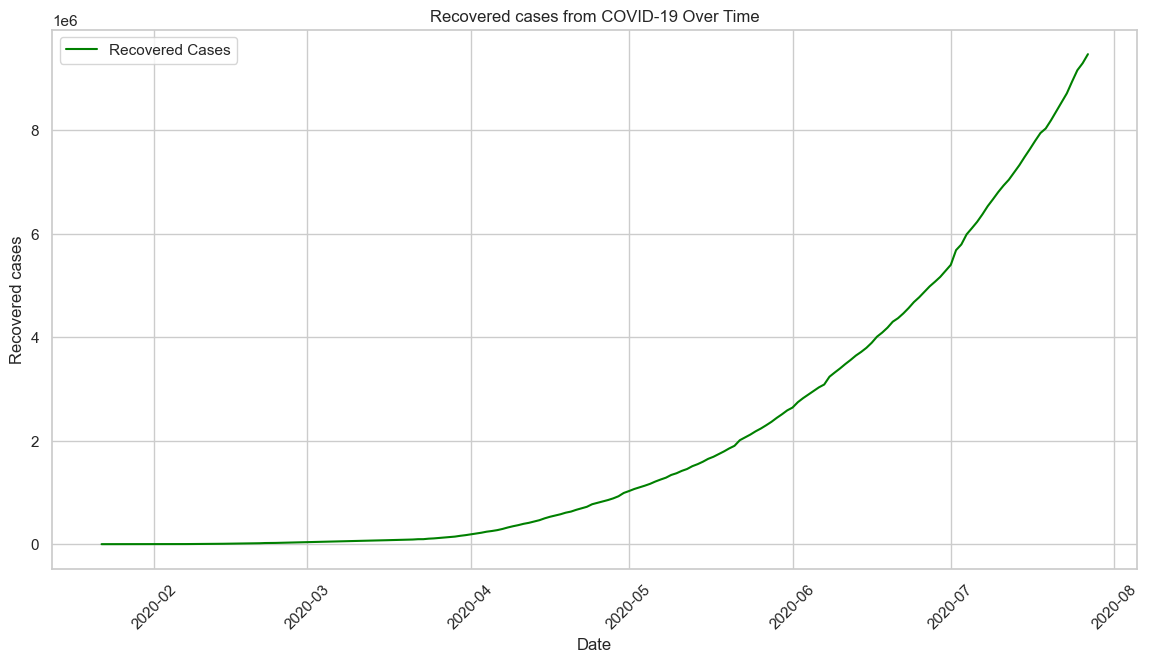

In [389]:
# Plot recover over time
plt.figure(figsize=(14, 7))
recovered_cases = covid_data_comp.groupby('Date')['Recovered'].sum()
plt.plot(recovered_cases.index, recovered_cases.values, label='Recovered Cases', color='green')
plt.title('Recovered cases from COVID-19 Over Time')
plt.xlabel('Date')
plt.ylabel('Recovered cases')
plt.legend()
plt.xticks(rotation=45)
plt.savefig("Recovered cases over time.png", dpi = 500)
plt.show()

In [391]:
#sort data by date and country and caluclate daily growth rates
covid_data_comp = covid_data_comp.sort_values(by = ["Country/Region", "Date"])
covid_data_comp["previous_confirmed"] = covid_data_comp.groupby("Country/Region")["Confirmed"].shift(1)

#let us define a function to calculate daily growth rate and handle where previous day is 0
#rounding to 2 decimal places and where previous confirmed case is 0, we want to return growth rate as zero(0)
def calculate_growth_rate(row):
    prev = row["previous_confirmed"]
    current = row["Confirmed"]
    if prev > 0 :
        return round(((current - prev) / prev) * 100, 2)
    else:
        return 0

#apply function to calculate the daily growth rate
covid_data_comp["daily_growth_rate"] = covid_data_comp.apply(calculate_growth_rate, axis = 1)

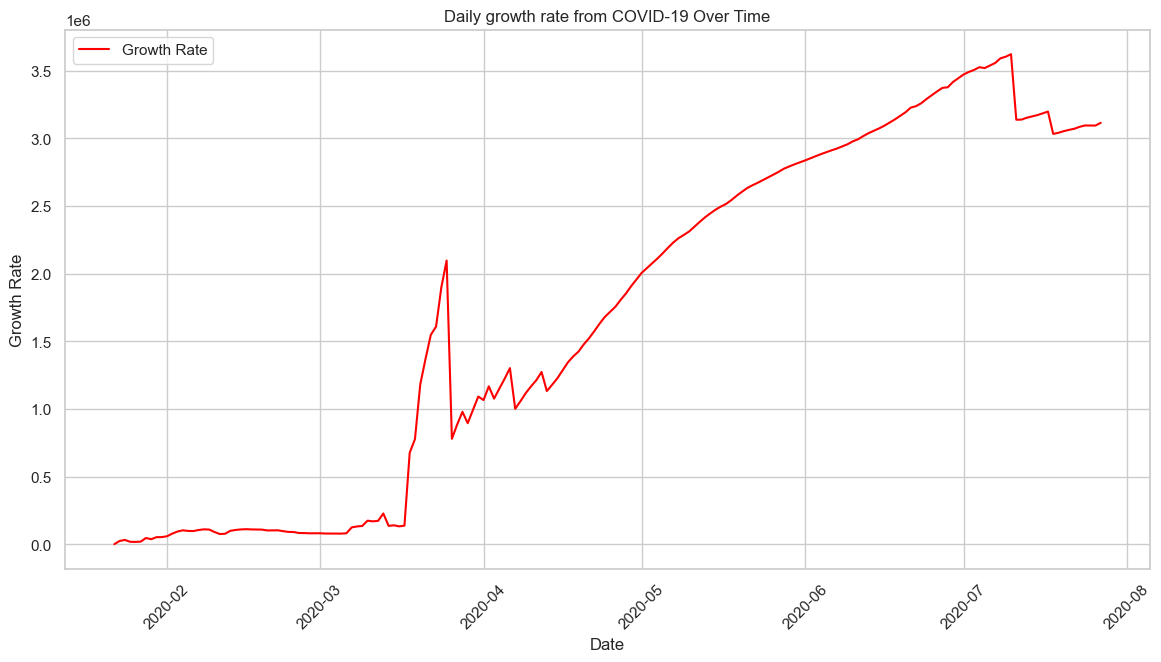

In [393]:
# Plot daily growth over time
plt.figure(figsize=(14, 7))
growth_rate = covid_data_comp.groupby('Date')['daily_growth_rate'].sum()
plt.plot(growth_rate.index, growth_rate.values, label='Growth Rate', color='red')
plt.title('Daily growth rate from COVID-19 Over Time')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.legend()
plt.xticks(rotation=45)
plt.savefig("Growth rate over time.png", dpi = 500)
plt.show()

In [395]:
#calculate the mortality ratio
def calcualte_mortality_ratio(row):
    confirmed_cases = row["Confirmed"]
    death_cases = row["Deaths"]

    #avoid division by zero
    if confirmed_cases > 0:
        return round((death_cases / confirmed_cases) * 100, 2)
    else:
        return 0

covid_data_comp["mortality_ratio"] = covid_data_comp.apply(calcualte_mortality_ratio, axis = 1)

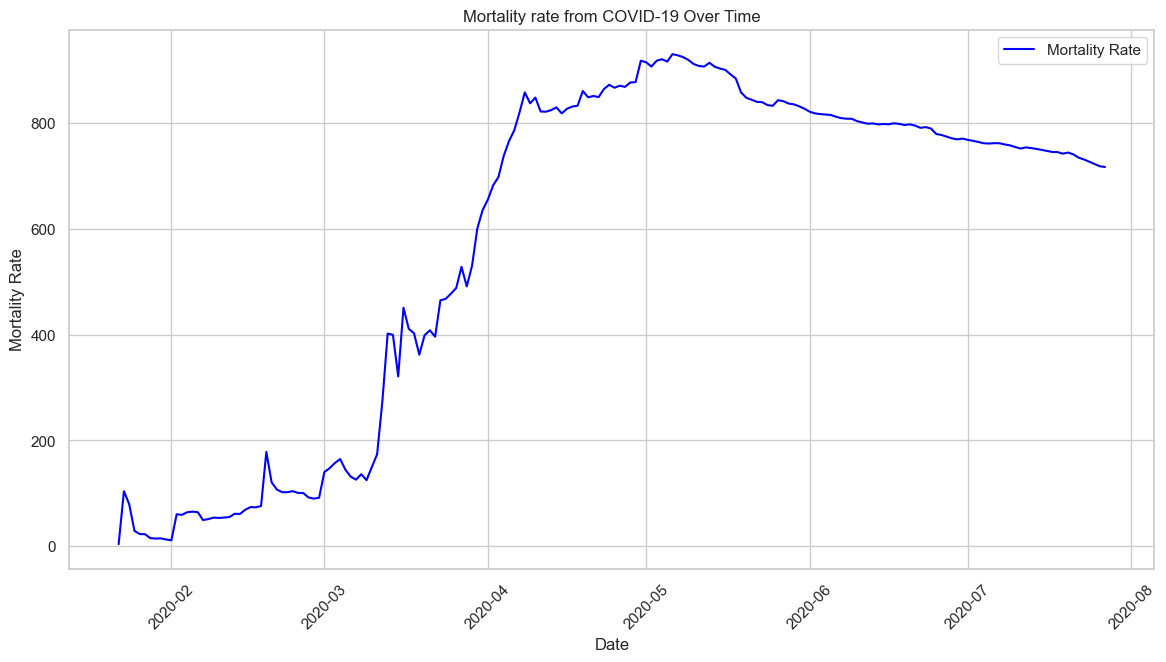

In [397]:
# Plot total deaths over time
plt.figure(figsize=(14, 7))
mortality_rate = covid_data_comp.groupby('Date')['mortality_ratio'].sum()
plt.plot(mortality_rate.index, mortality_rate.values, label='Mortality Rate', color='blue')
plt.title('Mortality rate from COVID-19 Over Time')
plt.xlabel('Date')
plt.ylabel('Mortality Rate')
plt.legend()
plt.xticks(rotation=45)
plt.savefig("Mortality rate over time.png", dpi = 500)
plt.show()

In [399]:
#calculate the death_rate per recovered cases
def calcualte_recovery_rate(row):
    recovered_cases = row["Recovered"]
    death_cases = row["Deaths"]

    #avoid division by zero
    if recovered_cases > 0:
        return round((death_cases / recovered_cases) * 100, 2)
    else:
        return 0

covid_data_comp["death/recovery_rate"] = covid_data_comp.apply(calcualte_recovery_rate, axis = 1)

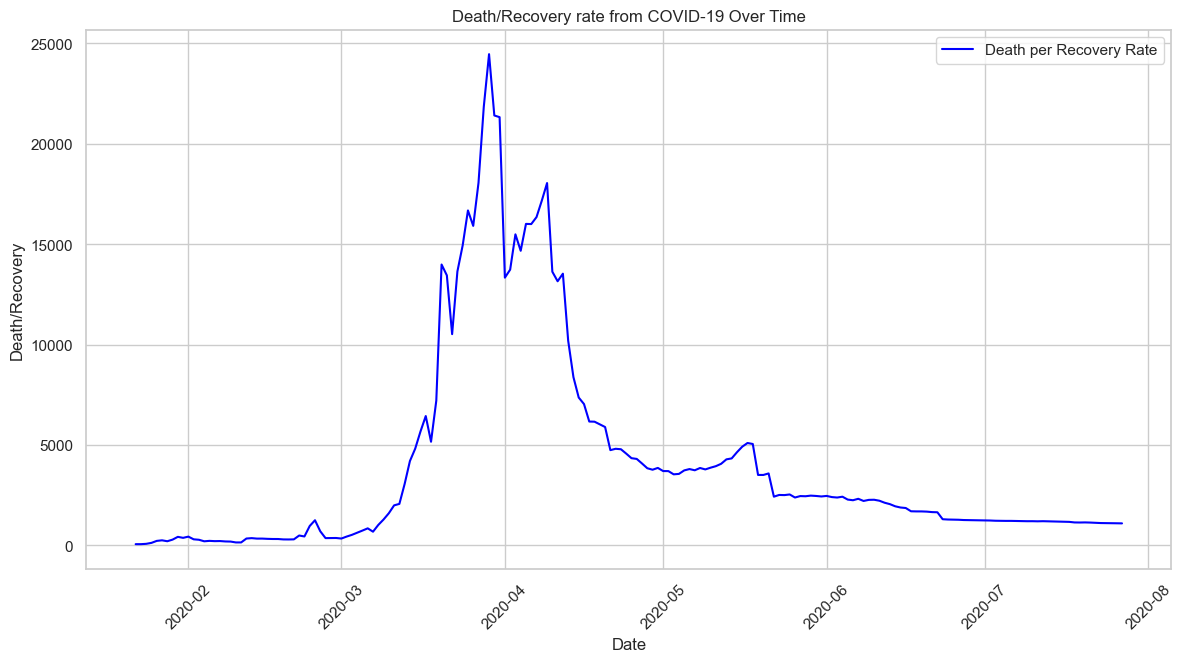

In [401]:
# Plot death_rate per recovered cases over time
plt.figure(figsize=(14, 7))
death_recovery_rate = covid_data_comp.groupby('Date')['death/recovery_rate'].sum()
plt.plot(death_recovery_rate.index, death_recovery_rate.values, label='Death per Recovery Rate', color='blue')
plt.title('Death/Recovery rate from COVID-19 Over Time')
plt.xlabel('Date')
plt.ylabel('Death/Recovery')
plt.legend()
plt.xticks(rotation=45)
plt.savefig("Death per Recovery rate over time.png", dpi = 500)
plt.show()

In [403]:
#calculate the recovery_rate per confirmed cases
def calcualte_recovery_rate_per_confirmed(row):
    recovered_cases = row["Recovered"]
    confirmed_cases = row["Confirmed"]

    #avoid division by zero
    if recovered_cases > 0:
        return round((recovered_cases / confirmed_cases) * 100, 2)
    else:
        return 0

covid_data_comp["recovery_rate/confirmed"] = covid_data_comp.apply(calcualte_recovery_rate_per_confirmed, axis = 1)

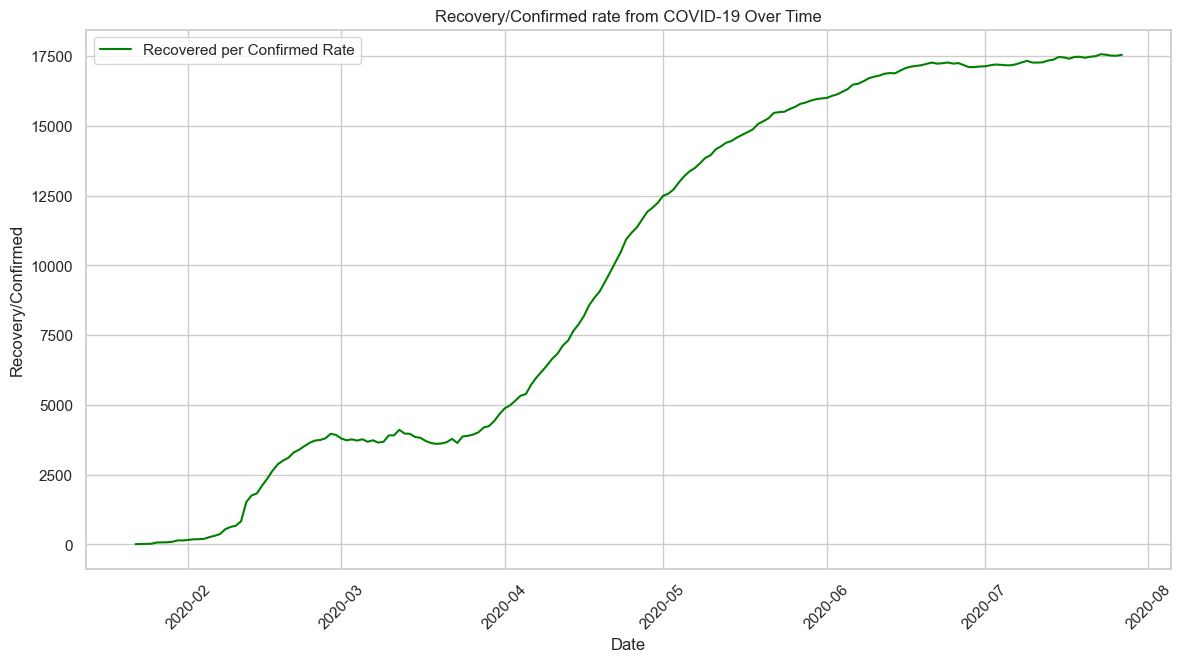

In [405]:
# Plot death_rate per recovered cases over time
plt.figure(figsize=(14, 7))
recovery_confirmed_rate = covid_data_comp.groupby("Date")["recovery_rate/confirmed"].sum()
plt.plot(recovery_confirmed_rate.index, recovery_confirmed_rate.values, label="Recovered per Confirmed Rate", color="green")
plt.title("Recovery/Confirmed rate from COVID-19 Over Time")
plt.xlabel("Date")
plt.ylabel("Recovery/Confirmed")
plt.legend()
plt.xticks(rotation=45)
plt.savefig("Recovery per Confirmed rate over time.png", dpi = 500)
plt.show()

In [407]:
#confirmed cases per day
total_cases = covid_data_comp.loc[:, ["Date", "Confirmed"]].groupby("Date").sum().reset_index()

In [409]:
total_cases

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [421]:
#sorting to know the day with the highest confirmed cases
total_cases.sort_values(by =("Confirmed"), ascending = False)

,Date,Confirmed
187,2020-07-27,16480485
186,2020-07-26,16251796
185,2020-07-25,16047190
184,2020-07-24,15791645
183,2020-07-23,15510481
...,...,...
4,2020-01-26,2118
3,2020-01-25,1434
2,2020-01-24,941
1,2020-01-23,654


In [411]:
highest = covid_data_comp.loc[covid_data_comp["Date"] == covid_data_comp["Date"].max()]
highest_casualities = highest.groupby("Country/Region")["Confirmed"].sum().sort_values(ascending = False).head(15).reset_index()
highest_casualities

,Country/Region,Confirmed
0,US,4290259
1,Brazil,2442375
2,India,1480073
3,Russia,816680
4,South Africa,452529
5,Mexico,395489
6,Peru,389717
7,Chile,347923
8,United Kingdom,301708
9,Iran,293606


C:\Users\USER\AppData\Local\Temp\ipykernel_7648\3080264551.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=highest_casualities["Confirmed"],


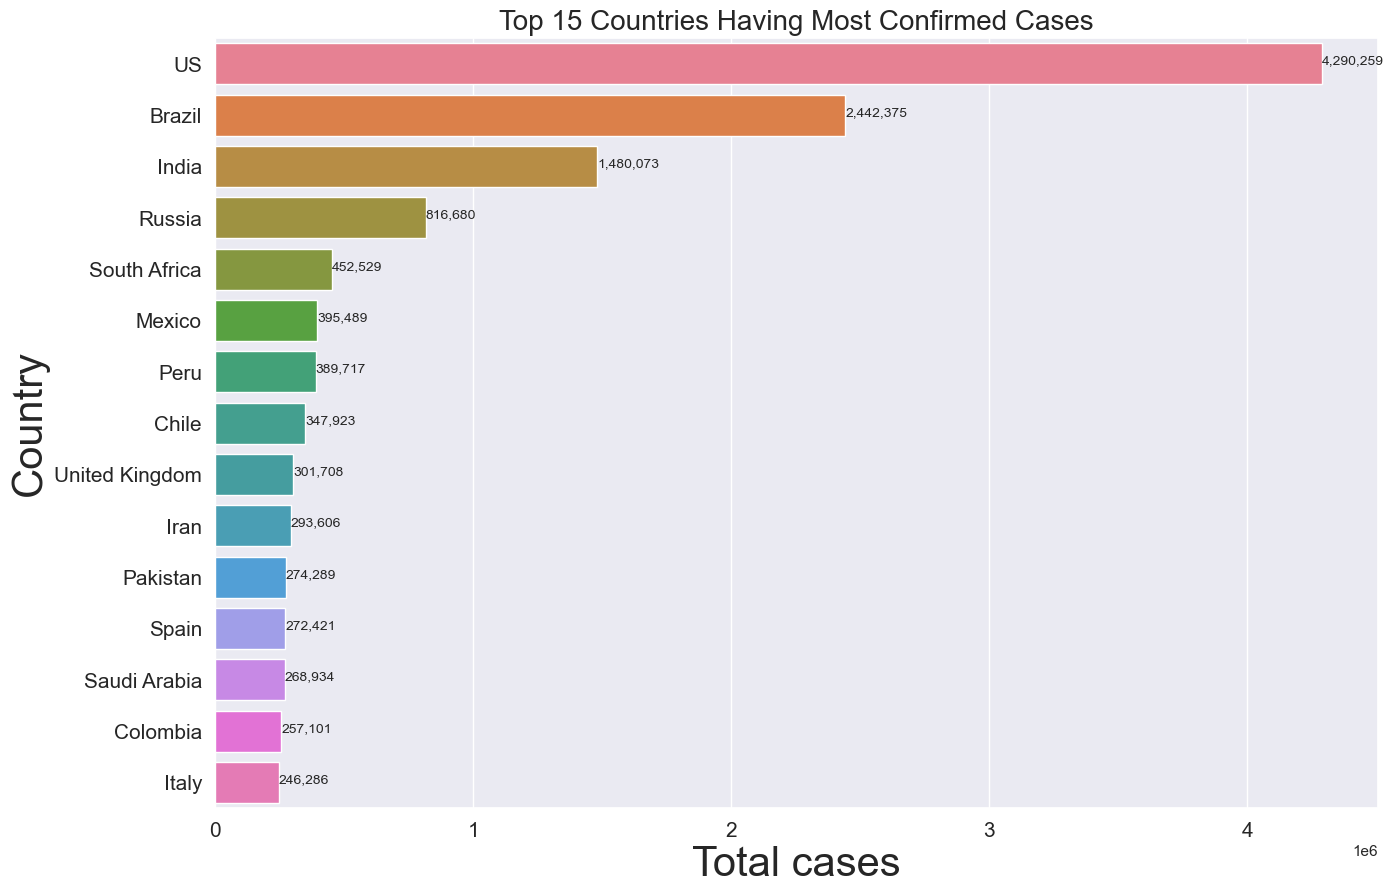

In [423]:
# Set the style for the plot
sns.set(style="darkgrid")

# Create a figure with specified size
plt.figure(figsize=(15, 10))

# Generate distinct colors for each bar
colors = sns.color_palette("husl", len(highest_casualities))
# Assuming 'Region' is a categorical variable in your DataFrame
ax = sns.barplot(x=highest_casualities["Confirmed"],
                 y=highest_casualities["Country/Region"],
                 palette = colors)
# Annotate each bar with its value
for i, (value, name) in enumerate(zip(highest_casualities["Confirmed"], highest_casualities["Country/Region"])):
    ax.text(value, i - 0.05, f"{value:,.0f}", size=10, ha="left", va="center")

# Set labels and title
ax.set(xlabel="Total cases", ylabel= "Country/Region")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases", fontsize=30)
plt.ylabel("Country", fontsize=30)
plt.title("Top 15 Countries Having Most Confirmed Cases", fontsize=20)
plt.savefig("Top Countries.png", dpi = 500)
# Show the plot
plt.show()

In [431]:
covid_data_comp.drop(columns = ["previous_confirmed", "WHO Region", "Province/State"])

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,daily_growth_rate,mortality_ratio,death/recovery_rate,recovery_rate/confirmed
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,0.00,0.00,0.00,0.00
261,Afghanistan,33.939110,67.709953,2020-01-23,0,0,0,0,0.00,0.00,0.00,0.00
522,Afghanistan,33.939110,67.709953,2020-01-24,0,0,0,0,0.00,0.00,0.00,0.00
783,Afghanistan,33.939110,67.709953,2020-01-25,0,0,0,0,0.00,0.00,0.00,0.00
1044,Afghanistan,33.939110,67.709953,2020-01-26,0,0,0,0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
47991,Zimbabwe,-19.015438,29.154857,2020-07-23,2124,28,510,1586,4.42,1.32,5.49,24.01
48252,Zimbabwe,-19.015438,29.154857,2020-07-24,2296,32,514,1750,8.10,1.39,6.23,22.39
48513,Zimbabwe,-19.015438,29.154857,2020-07-25,2434,34,518,1882,6.01,1.40,6.56,21.28
48774,Zimbabwe,-19.015438,29.154857,2020-07-26,2512,34,518,1960,3.20,1.35,6.56,20.62


In [433]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Select relevant features for regression
# Assuming 'Deaths', 'Recovered', and 'Active' are available in the dataset.
features = ["Deaths", "Recovered", "Active", "daily_growth_rate", "mortality_ratio"]
X = covid_data_comp[features]

# Target variable: Number of confirmed cases
y = covid_data_comp["Confirmed"]

# Handle missing values if any
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\USER\AppData\Local\Temp\ipykernel_7648\1797315941.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [435]:
# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [437]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Absolute Error (MAE): 237.54
Root Mean Squared Error (RMSE): 2491.60


In [439]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')

Mean Squared Error: 6208070.9447799055
R-squared Score: 0.9995350331288442


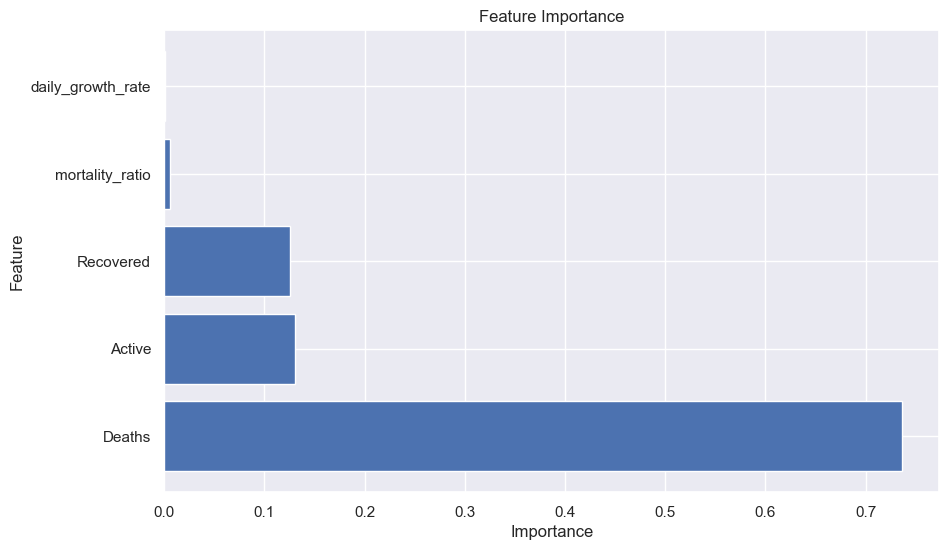

In [443]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig("Feature Importance.png", dpi = 500)
plt.show()